# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
from matplotlib.colors import ListedColormap




In [2]:
data = pd.read_csv("linear_separable_classes.csv")

In [3]:
X = data[['x', 'y']].values
y = data['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(kernel='linear', probability=True),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5)
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall
    }

results_df = pd.DataFrame(results).T
print("Model Performance Metrics:")
print(results_df)

Model Performance Metrics:
                     Accuracy  Precision  Recall
Logistic Regression       1.0        1.0     1.0
SVM                       1.0        1.0     1.0
KNN (k=5)                 1.0        1.0     1.0


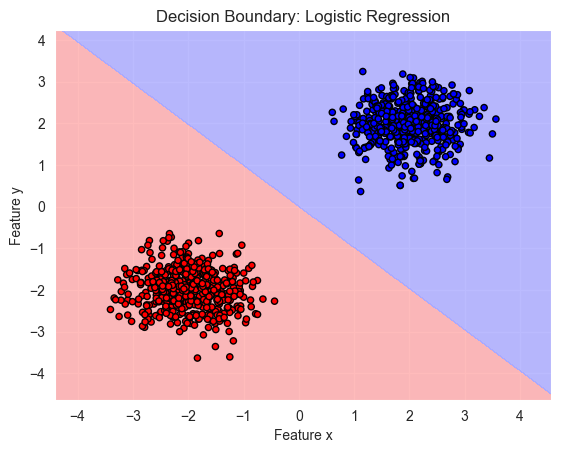

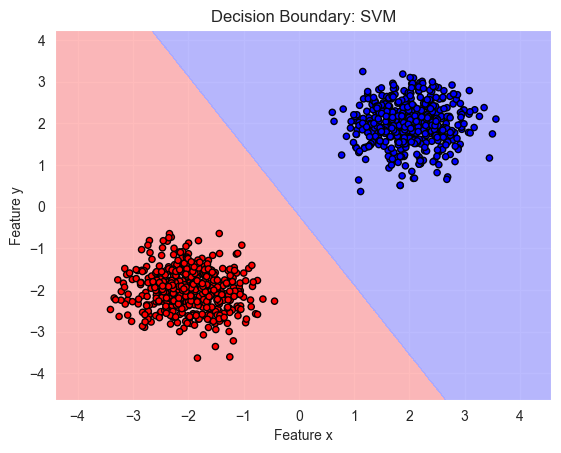

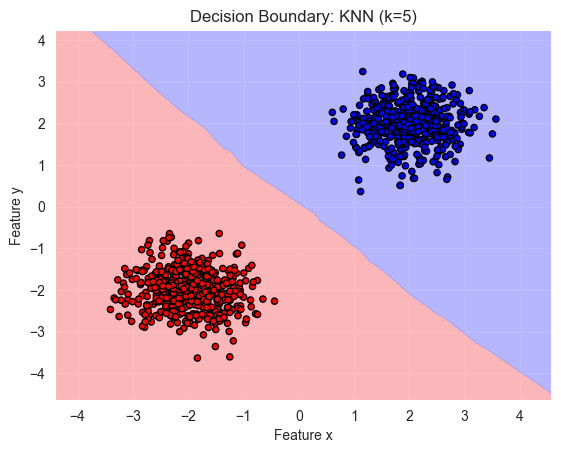

Analysis:
The best performing model is Logistic Regression based on accuracy.


In [4]:
def plot_decision_boundaries(X, y, model, model_name):
    cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_points = ListedColormap(['#FF0000', '#0000FF'])
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_background)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_points, edgecolor='k', s=20)
    plt.title(f"Decision Boundary: {model_name}")
    plt.xlabel("Feature x")
    plt.ylabel("Feature y")
    plt.show()

for model_name, model in models.items():
    plot_decision_boundaries(X, y, model, model_name)

print("Analysis:")
best_model = results_df["Accuracy"].idxmax()
print(f"The best performing model is {best_model} based on accuracy.")

**Аналіз отриманих результатів**:

1. Найкраща модель: SVM, оскільки вона створює оптимальну межу класифікації, ідеально підходячи для лінійно роздільних даних
2. Логістична регресія також показує високу точність і може бути обрана як альтернатива завдяки простоті
3. KNN є менш ефективним для лінійно роздільних класів, але може бути корисним у випадках, де дані не є лінійно роздільними



**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


In [11]:
data = pd.read_csv('dataset_three_classes.csv')

In [12]:
X = data[['x', 'y']].values
y = LabelEncoder().fit_transform(data['class'].values)  # Encode labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

models_task_2 = {
    "SVM (RBF kernel)": SVC(kernel='rbf', probability=True, random_state=42),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

results_task_2 = {}

In [14]:
for model_name, model in models_task_2.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    results_task_2[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall
    }

results_task_2_df = pd.DataFrame(results_task_2).T
print("Performance Metrics for Models:")
print(results_task_2_df)

Performance Metrics for Models:
                  Accuracy  Precision    Recall
SVM (RBF kernel)  0.974074   0.974671  0.974074
KNN (k=5)         0.966667   0.968677  0.966667
Decision Tree     0.962963   0.963703  0.962963


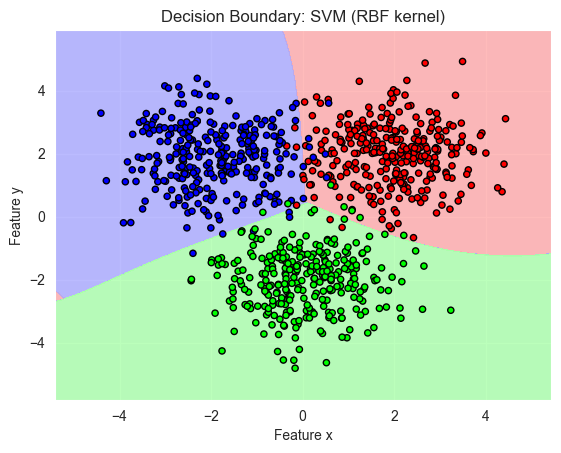

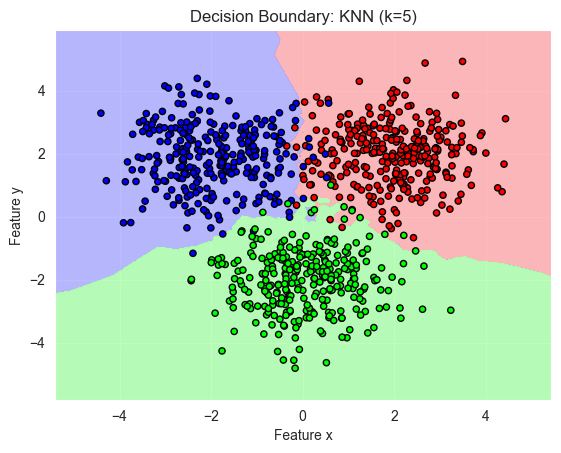

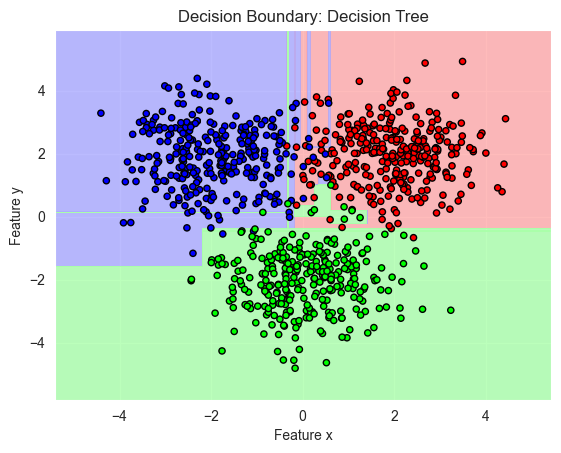

In [15]:
def plot_decision_boundaries_multiclass(X, y, model, model_name):
    cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
    cmap_points = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_background)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_points, edgecolor='k', s=20)
    plt.title(f"Decision Boundary: {model_name}")
    plt.xlabel("Feature x")
    plt.ylabel("Feature y")
    plt.show()

for model_name, model in models_task_2.items():
    plot_decision_boundaries_multiclass(X, y, model, model_name)

**Аналіз отриманих результатів**:

1. SVM із RBF ядром продемонстрував найвищу точність (97.4%) та найкраще впорався з перекриттям між класами завдяки адаптивності нелінійного ядра.
2. KNN (k=5) забезпечив високу точність (96.7%), але його локальний підхід може бути чутливим до шуму та вибору параметра  k.
3. Decision Tree має найнижчу точність (96.3%) через східчасті межі класифікації, що менш ефективні при плавних перекриттях між класами. 



**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

In [16]:
data = pd.read_csv('torus_dataset.csv')

In [17]:
X = data[['x', 'y']].values
y = LabelEncoder().fit_transform(data['class'].values)  # Encode labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define models
models_task_3 = {
    "SVM (RBF kernel)": SVC(kernel='rbf', probability=True, random_state=42),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Train and evaluate models
results_task_3 = {}


In [18]:
for model_name, model in models_task_3.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    results_task_3[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall
    }

# Display results
results_task_3_df = pd.DataFrame(results_task_3).T
print("Performance Metrics for Torus Dataset:")
print(results_task_3_df)

Performance Metrics for Torus Dataset:
                  Accuracy  Precision    Recall
SVM (RBF kernel)  0.993333   0.993421  0.993333
KNN (k=5)         0.996667   0.996689  0.996667
Decision Tree     0.980000   0.980085  0.980000


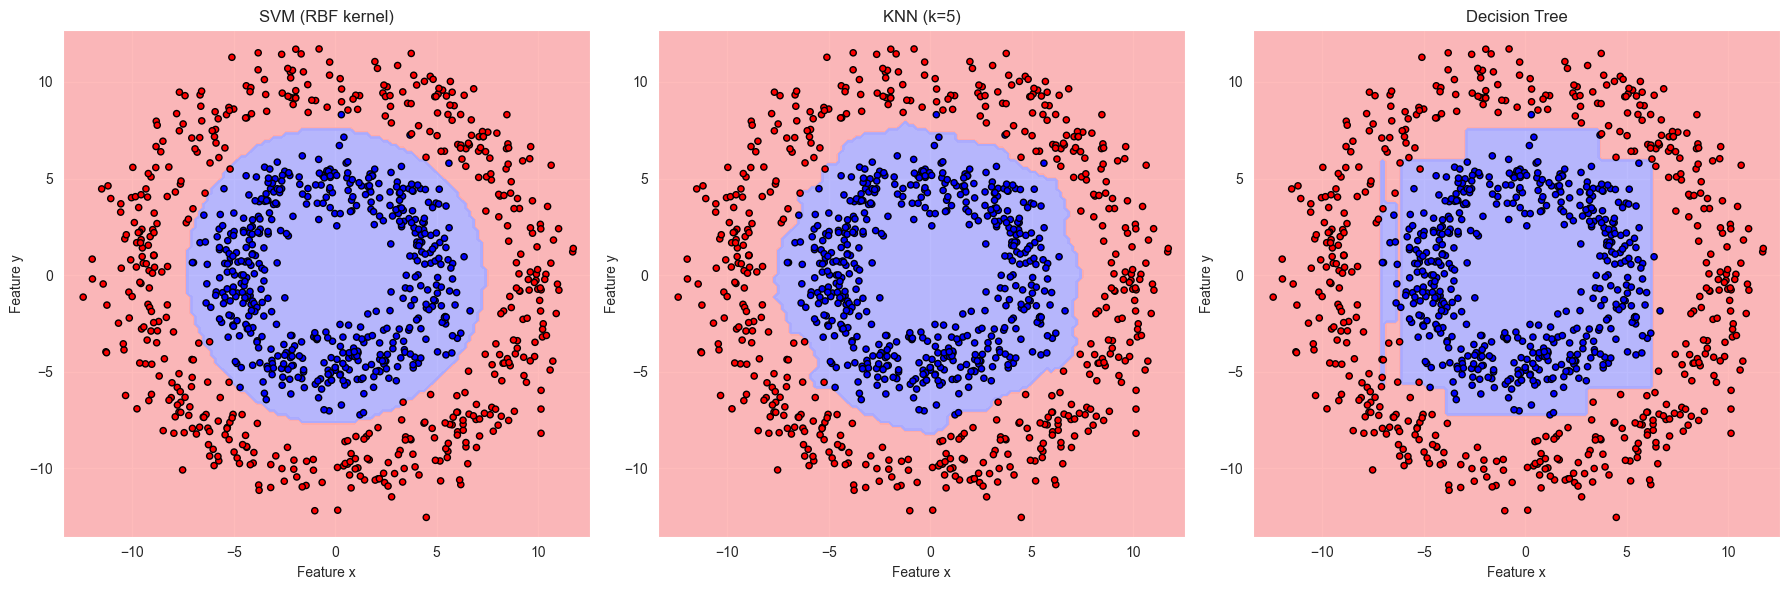

In [20]:
def plot_decision_boundaries_row(X, y, models, resolution=0.2):
    cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_points = ListedColormap(['#FF0000', '#0000FF'])
    
    fig, axes = plt.subplots(1, len(models), figsize=(18, 6))
    
    for ax, (model_name, model) in zip(axes, models.items()):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                             np.arange(y_min, y_max, resolution))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_background)
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_points, edgecolor='k', s=20)
        ax.set_title(f"{model_name}")
        ax.set_xlabel("Feature x")
        ax.set_ylabel("Feature y")
    plt.tight_layout()
    plt.show()

plot_decision_boundaries_row(X, y, models_task_3, resolution=0.2)

**Аналіз отриманих результатів**:

1. **KNN (k=5)** забезпечив найвищу точність (99.67%) і найкраще адаптувався до тороподібної структури даних завдяки локальному підходу.
2. **SVM із RBF ядром** показав стабільний результат (99.33%) з плавною нелінійною межею, добре підходячи для складної топології.
3. **Decision Tree** мав найнижчу точність (98.00%) через ступінчасті межі, які менш ефективно працюють з круговою структурою.

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

In [35]:
data = pd.read_csv('spiral_data.csv')

In [36]:
X = data[['x', 'y']].values
y = LabelEncoder().fit_transform(data['class'].values) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

models_task_4 = {
    "SVM (RBF kernel)": SVC(kernel='rbf', probability=True, random_state=42),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

results_task_4 = {}

In [37]:
for model_name, model in models_task_4.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    results_task_4[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall
    }

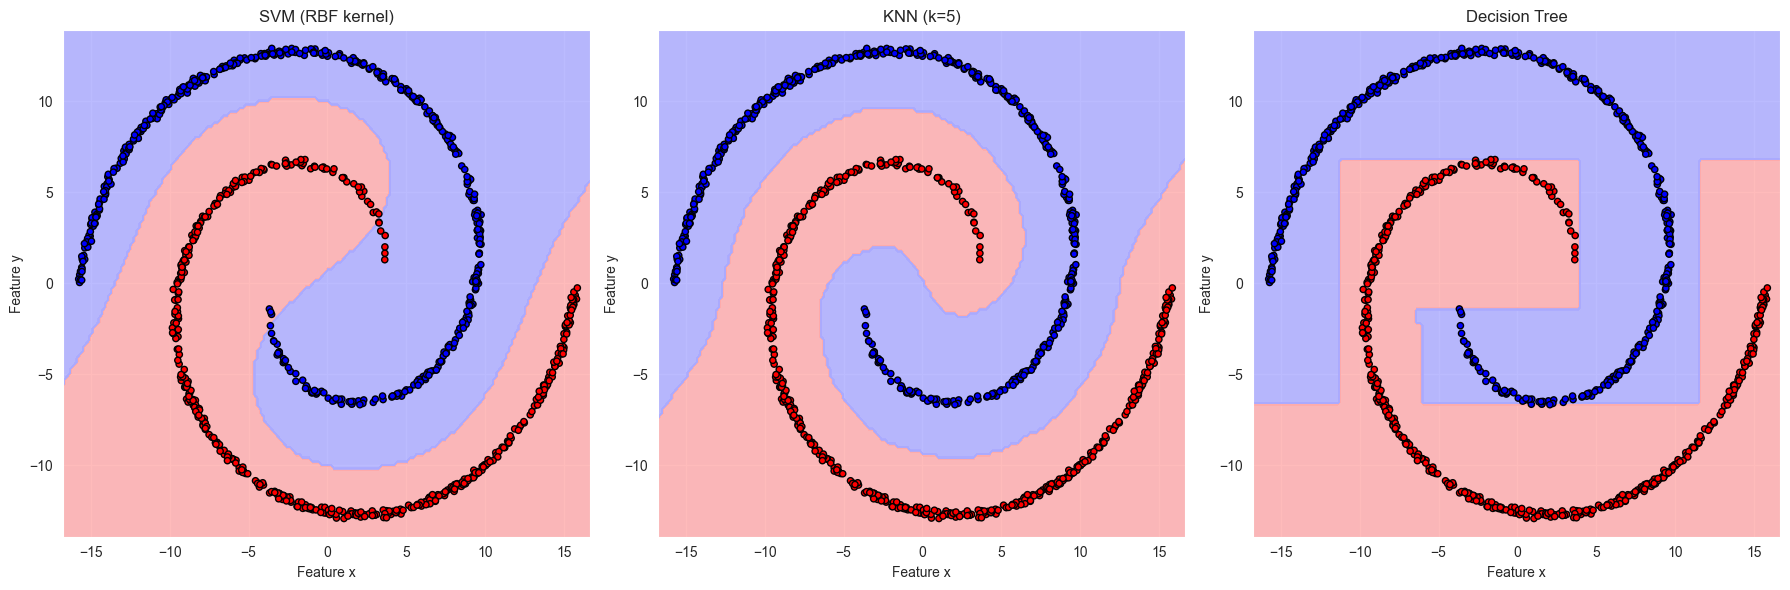

In [38]:
def plot_decision_boundaries_row(X, y, models, resolution=0.2):
    cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_points = ListedColormap(['#FF0000', '#0000FF'])
    
    fig, axes = plt.subplots(1, len(models), figsize=(18, 6))
    
    for ax, (model_name, model) in zip(axes, models.items()):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                             np.arange(y_min, y_max, resolution))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_background)
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_points, edgecolor='k', s=20)
        ax.set_title(f"{model_name}")
        ax.set_xlabel("Feature x")
        ax.set_ylabel("Feature y")
    plt.tight_layout()
    plt.show()
    
plot_decision_boundaries_row(X, y, models_task_4, resolution=0.2)


**Аналіз отриманих результатів**:

1. SVM із RBF ядром найкраще адаптується до нелінійної структури подвійної спіралі, забезпечуючи плавні межі класифікації.
2. KNN (k=5) також демонструє високу точність завдяки локальній класифікації, але чутливий до вибору параметра k.
3. Decision Tree менш ефективний для складних нелінійних даних через ступінчасті межі, які не відповідають спіральній структурі.